In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class MyMDS:
    def __init__(self,n_components):
        self.n_components=n_components
    
    def fit(self,data):
        m,n=data.shape
        dist=np.zeros((m,m))
        disti=np.zeros(m)
        distj=np.zeros(m)
        B=np.zeros((m,m))
        for i in range(m):
            dist[i]=np.sum(np.square(data[i]-data),axis=1).reshape(1,m)
        for i in range(m):
            disti[i]=np.mean(dist[i,:])
            distj[i]=np.mean(dist[:,i])
        distij=np.mean(dist)
        for i in range(m):
            for j in range(m):
                B[i,j] = -0.5*(dist[i,j] - disti[i] - distj[j] + distij)
        lamda,V=np.linalg.eigh(B)
        index=np.argsort(-lamda)[:self.n_components]
        diag_lamda=np.sqrt(np.diag(-np.sort(-lamda)[:self.n_components]))
        V_selected=V[:,index]
        Z=V_selected.dot(diag_lamda)
        return Z

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()

Text(0.5, 1.0, 'Using My MDS')

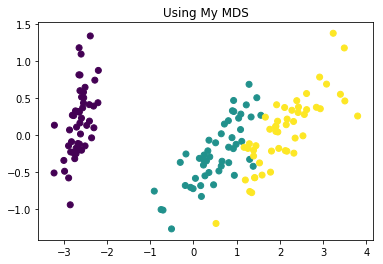

In [4]:
clf1=MyMDS(2)
iris_t=clf1.fit(iris.data)
plt.scatter(iris_t[:,0],iris_t[:,1],c=iris.target)
plt.title('Using My MDS')

Text(0.5, 1.0, 'Using sklearn MDS')

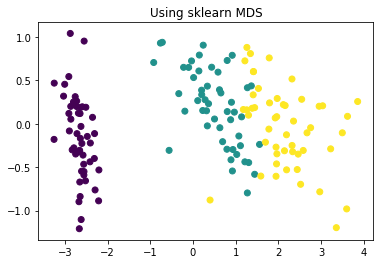

In [5]:
from sklearn.manifold import MDS
clf2=MDS(2)
clf2.fit(iris.data)
iris_t2=clf2.fit_transform(iris.data)
plt.scatter(iris_t2[:,0],iris_t2[:,1],c=iris.target)
plt.title('Using sklearn MDS')

Text(0.5, 1.0, 'Using My MDS')

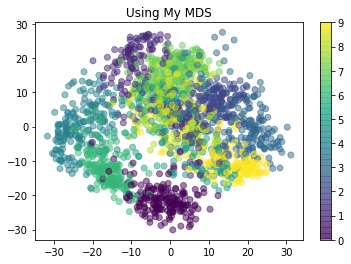

In [6]:
from sklearn.datasets import load_digits
digits=load_digits()
clf3=MyMDS(2)
digits_t1=clf3.fit(digits.data)
plt.scatter(digits_t1[:,0],digits_t1[:,1],c=digits.target,
           alpha=.5)
plt.colorbar()
plt.title('Using My MDS')

Text(0.5, 1.0, 'Using sklearn MDS')

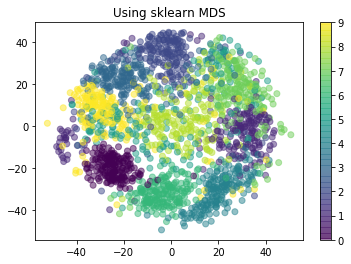

In [7]:
from sklearn.manifold import MDS
mds=MDS(n_components=2)
mds.fit(digits.data)
digits_t2=mds.fit_transform(digits.data)
plt.scatter(digits_t2[:,0],digits_t2[:,1],c=digits.target,
            alpha=.5)
plt.colorbar()
plt.title('Using sklearn MDS')

Text(0.5, 1.0, 'Using sklearn PCA')

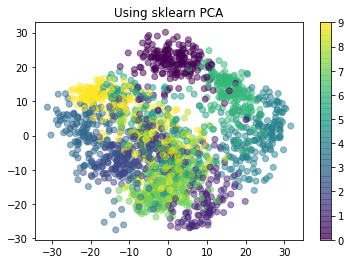

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(digits.data)
digits_t2=pca.fit_transform(digits.data)
plt.scatter(digits_t2[:,0],digits_t2[:,1],c=digits.target
           ,alpha=.5)
plt.colorbar()
plt.title('Using sklearn PCA')

Text(0.5, 1.0, 'Using sklearn Isomap')

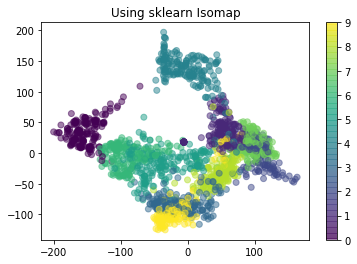

In [9]:
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
iso.fit(digits.data)
digits_projected=iso.transform(digits.data)
plt.scatter(digits_projected[:,0],digits_projected[:,1],c=digits.target
           ,alpha=.5)
plt.colorbar()
plt.title('Using sklearn Isomap')